In [1]:
"""
    Example structure for fitting multiple models, feel free to modify to your liking
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib as mpl
from abc import ABC, abstractmethod

In [2]:
df = pd.read_csv('gen_data.csv')
df["pressed"] = df["pressed"].astype(bool)

# Go+ = Go to win
# Go- = go to avoid losing
# NoGo+ = don't go to win
# NoGo- = don't go to avoid losing

# pressed = 1: approached
# pressed = 0: withhold
# withdraw: not existing
cue_mapping = {1: 'Go+', 2: 'Go-', 3: 'NoGo+', 4: 'NoGo-'}  

In [3]:
df

,Unnamed: 0,cue,pressed,outcome,ID
0,0,1,True,1,0
1,1,1,True,1,0
2,2,2,False,-1,0
3,3,2,True,0,0
4,4,1,True,1,0
...,...,...,...,...,...
5995,595,4,False,-1,9
5996,596,3,False,1,9
5997,597,2,True,0,9
5998,598,4,True,-1,9


/tmp/ipykernel_85860/2173120731.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cue_df["accuracy"] = true_positives.astype(int)
/tmp/ipykernel_85860/2173120731.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cue_df["accuracy"] = true_positives.astype(int)
/tmp/ipykernel_85860/2173120731.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Text(0.5, 0, 'Cue')

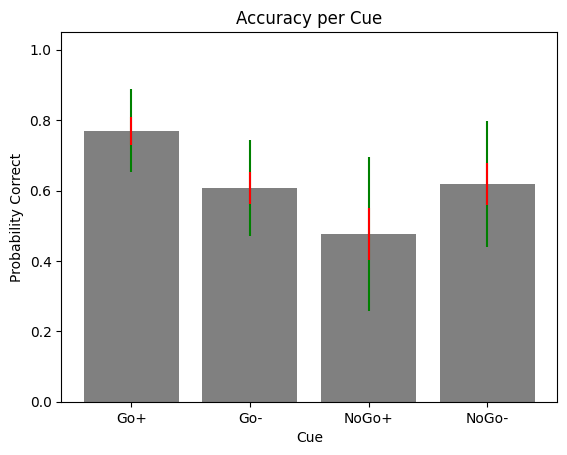

In [10]:
# exercise 1: plot the accuracy for each cue
fig, ax = plt.subplots()
for cue, name in cue_mapping.items():
    cue_df = df[df["cue"] == cue]
    if "+" in name:
        outcome = cue_df["outcome"] == 1
    elif "-" in name:
        outcome = cue_df["outcome"] == 0
    else:
        raise NotImplementedError
    
    pressed = cue_df["pressed"]
    if "No" in name:
        pressed = 1 - pressed
    
    true_positives = outcome * pressed
    cue_df["accuracy"] = true_positives.astype(int)
    cue_df = cue_df.groupby("ID").mean()
    ax.bar(name, cue_df["accuracy"].mean(), color="grey")
    ax.errorbar(name, cue_df["accuracy"].mean(), cue_df["accuracy"].std() * 3, c="green")
    ax.errorbar(name, cue_df["accuracy"].mean(), cue_df["accuracy"].std(), c="r")
    # ax.scatter([name] * len(cue_df), cue_df["accuracy"], s=5, color="k")
    
ax.set_ylim([0, 1.05])
ax.set_title("Accuracy per Cue")
ax.set_ylabel("Probability Correct")
ax.set_xlabel("Cue")

In [11]:
# define yourself a softmax function
def softmax(x: np.ndarray, axis: int=0):
    logits = np.exp(x)
    sm = logits / np.sum(logits, axis=axis, keepdims=True)
    return sm

def logsoftmax(x: np.ndarray, axis: int = 0):
    logits = np.exp(x)
    lsm = x - np.sum(logits, axis=axis, keepdims=True)
    return lsm
# define a function to compute the BIC


In [13]:
class Model(ABC):
    def __init__(
        self,
        n_states: int,
        n_actions: int,
        learning_rate: float = 0.1,
        beta: np.ndarray = None,
        bias: np.ndarray = None
    ):
        self.learning_rate = learning_rate
        self.beta = beta if beta is not None else np.ones(n_actions)
        self.q = np.zeros((n_states, n_actions))
        self.bias = bias if bias is not None else np.ones(n_actions)

        self.n_params: int
    
    @abstractmethod
    def fit(self, data: np.ndarray):
        raise NotImplementedError

    def score(self, states: np.ndarray) -> float:
        """_summary_

        Args:
            states (np.ndarray): (n_samples), list of discrete states

        Returns:
            float: (n_samples, n_actions)
        """
        w = self.get_weights()
        log_likelihood = logsoftmax(w[states], axis=1)
        return log_likelihood

    def bic(self, data: np.ndarray) -> float:
        
        ll = self.score(data)
        n_samples = len(data)
        return -2 * ll + self.n_params * np.log(n_samples)
    
    def get_weights(self) -> np.ndarray:
        return self.q + self.bias[None]


class Model1(Model):
    def __init__(self, n_states, n_actions, learning_rate=0.1, beta=None):
        if beta is None:
            beta = 1
        beta = np.ones(n_actions) * beta
        super().__init__(n_states, n_actions, learning_rate, beta)
        self.n_params = 2

    def fit(self, data: np.ndarray):
        for row in data.values:
            state = row[1] - 1
            action = int(row[2])
            reward = row[3]
            self.q[state, action] += self.learning_rate * (
                self.beta[action] * reward - q[state, action]
            )
        log_likelihood = np.log(softmax(self.q, axis=1))

    

model = Model1(len(cue_mapping), 2, beta=1)

In [ ]:
method = 'Nelder-Mead'  # this optimization should work for the given data, but feel free to try others as well, they might be faster




for j, learner in enumerate([model_1]):

    for i, subject in enumerate(np.unique(df.ID)):
        subject_data = ... # subset data to one subject
        subject_data = subject_data.reset_index(drop=True)  # not resetting the index can lead to issues

        if j == 0:

            # define yourself a loss for the current model
            def loss(params):
                return ...
            res = minimize(loss, ...initial_params..., bounds=..., method=method)
            # save the optimized log-likelihood

            # save the fitted parameters

    # compute BIC


# plot learning rates of the last model


# Bonus


    

